# Author - Akash Singh


# The Sparks Foundation - GRIP- Data Science and Business Analytics


# April 2022


# Task 1 - Prediction using Supervised Machine Learning



## Predicting the percentage of a student based on the number of study hours.




### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Reading Data from Dataset URL

In [2]:
# For reading the dataset

student_score = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [3]:
# To view first five rows from the Dataset

student_score.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Exploring Data

In [4]:
# .shape funtion will show total rows and columns present in the Data

student_score.shape

(25, 2)

In [5]:
# Using .info() to review the basic info about the dataframes

student_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
# Using .isnull() to check for presence of null values

student_score.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
# Using .corr() to check the correlation between number of hours studied and respective scores

student_score.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Statistical values

In [8]:
# Using .describe() function to check statistical values of those two variables.

student_score.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Plotting Data

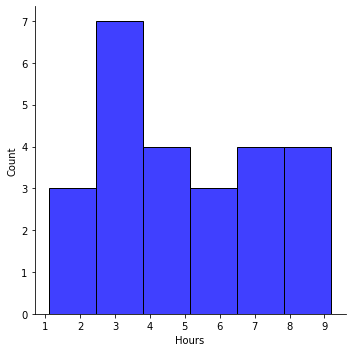

In [9]:
# Visual Representation through Histogram

sns.displot(student_score['Hours'], color='blue')

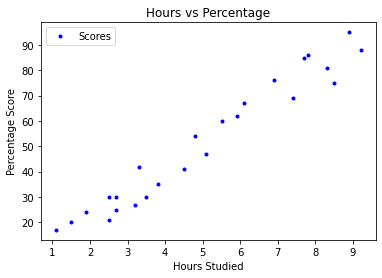

In [10]:
# Plotting the Score Distribution in Data

student_score.plot(x='Hours', y='Scores', style= '.', color='blue')
plt.title ('Hours vs Percentage')
plt.xlabel ('Hours Studied')
plt.ylabel ('Percentage Score')
plt.show()

In [11]:
# Dividing Data into Attributes/Inputs and Outputs

x = student_score.iloc[:, :-1].values
y = student_score.iloc[:, 1].values
y.shape, x.shape

((25,), (25, 1))

In [12]:
# Splitting Data into Training and Testing Sets using Scikit-Learn's built in train_test-split() method

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.1, random_state= 0)

In [13]:
# Training the algorithm

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

### Plotting Regression Line

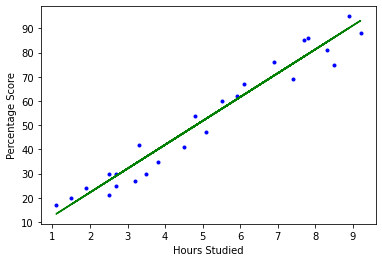

In [14]:
line = reg.coef_* x + reg.intercept_


#Plotting for test data

plt.scatter(x, y, color = 'blue', marker = '.')
plt.plot(x, line, color = 'green', )
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

### Making Predictions and Comparing actual and Predicted values

In [15]:
y_pred=reg.predict(x_test) # predicted test values
actual_predicted=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
actual_predicted

,Actual,Predicted
0,20,17.302210
1,27,34.055294
2,69,75.445267


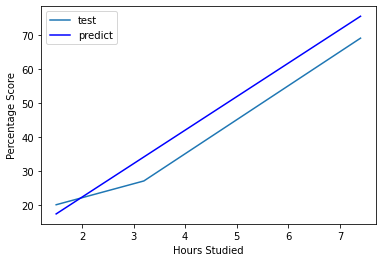

In [16]:
plt.plot(x_test, y_test, label='test')
plt.plot(x_test, y_pred, color='blue', label='predict')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
leg=plt.legend()
plt.show()

In [17]:
hours = [[2], [5.4], [8], [9]]
own_pred = reg.predict(hours)
print ('No. of Hours Studied = {}'.format(hours))
print ('Predicted Score = {}'.format(own_pred))

No. of Hours Studied = [[2], [5.4], [8], [9]]
Predicted Score = [22.22958753 55.73575592 81.35811999 91.2128754 ]


### Q. What will be the predicted score if a student studies for 9.5 hours/day ?

In [18]:
Percentage_Score = reg.predict(np.array([[9.5]]))
print ('Number of Hours Studied : 9.5 hrs/day')
print (f'Percentage Score : {Percentage_Score}')

Number of Hours Studied : 9.5 hrs/day
Percentage Score : [96.1402531]


### Evaluating the Model

For evaluating the performance of our algorithm, to compare how well different algorithms perform on a particular dataset

In [19]:
from sklearn import metrics
print ('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 5.399450313612005


In [20]:
print ('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 32.865569647342106


## So the Predicted Score if a student studies for 9.5 hours/day will be 96.14